EDAS IMPLEMENTATION

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
mobile_full=pd.read_excel('edas_data_python.xlsx')
mobile_full.head()

,Alternatives,P/E RATİO,M/B RATIO,EPS,DIV. YIELD,DIV. PAYOUT
0,AEFES,15.596684,0.426024,1.804230,0.063754,0.911525
1,AVOD,15.107937,1.902159,0.125100,0.064819,0.000000
2,BANVT,109.431308,8.433842,0.951282,0.009068,0.000000
3,CCOLA,14.436836,2.225982,8.928549,0.068157,0.266561
4,DARDL,12.916062,9.940285,0.274077,0.077423,0.000000


REFERENCE TABLE

In [ ]:
criteria=['P/E RATIO','M/B RATIO','EPS','DIV. YIELD','DIV. PAYOUT']
weights=[0.230936265226239,0.167860748676065,0.244467922233103,0.196904467704045,0.159830596160548]
types=['cost','cost','benefit','benefit','cost']
mobile_full_v2=mobile_full.iloc[:,1:6]
mobile_full_v2.head()
mobile_full_np=np.array(mobile_full_v2)
print(mobile_full_np)

[[ 1.55966845e+01  4.26023631e-01  1.80422962e+00  6.37536967e-02
   9.11524778e-01]
 [ 1.51079369e+01  1.90215900e+00  1.25099808e-01  6.48185531e-02
   0.00000000e+00]
 [ 1.09431308e+02  8.43384206e+00  9.51281692e-01  9.06846227e-03
   0.00000000e+00]
 [ 1.44368359e+01  2.22598214e+00  8.92854925e+00  6.81568645e-02
   2.66560662e-01]
 [ 1.29160621e+01  9.94028465e+00  2.74077345e-01  7.74229787e-02
   0.00000000e+00]
 [ 3.80000000e+00  1.76000000e+00  1.65000000e+00  2.63157895e-01
   0.00000000e+00]
 [ 2.69289455e+01  4.42461929e+00  6.96648148e-01  3.59653148e-02
   1.07658364e+00]
 [ 7.55373593e+01  3.50904083e+00  5.42777778e-02  1.33360633e-02
   0.00000000e+00]
 [ 1.62857737e+01  2.51100535e+00  3.86840694e-01  6.03495622e-02
   0.00000000e+00]
 [ 1.44992930e+01  1.90044044e+00  6.76584713e-01  6.87586091e-02
   1.67458705e-01]
 [ 1.88192144e+01  5.00493626e+00  3.84181818e-01  4.83247570e-02
   0.00000000e+00]
 [ 1.22835003e+02  5.78659969e+00  5.51145833e-02  7.40787410e-03

Step-1) Determine the average solution (AVj)

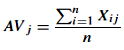

In [ ]:
AVj=mobile_full_np.mean(axis=0)
print('AVj = ',AVj)

AVj =  [40.43907549  2.98770978  0.97363914  0.05463694  0.50392675]


Step-2)Calculate the Positive Distance from Average (PDA)


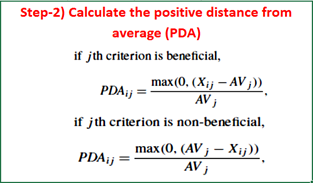

In [ ]:
pos_pda=np.zeros(shape=(mobile_full_np.shape[0],mobile_full_np.shape[1]))
for k in range(mobile_full_np.shape[1]):
  for l in range(mobile_full_np.shape[0]):
    if types[k]=='benefit':
      m=max(0,(mobile_full_np[l][k]-AVj[k]))/AVj[k]
      pos_pda[l][k]=+m
    else :  
      m=max(0,(AVj[k]-mobile_full_np[l][k]))/AVj[k]
      pos_pda[l][k]=+m
print(pos_pda)      


[[0.61431649 0.85740796 0.85307835 0.16686071 0.        ]
 [0.62640251 0.36333876 0.         0.18635039 1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.64299788 0.25495369 8.17028585 0.24745028 0.47103291]
 [0.68060442 0.         0.         0.4170446  1.        ]
 [0.90603148 0.41092002 0.69467304 3.81648317 1.        ]
 [0.33408603 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.59727631 0.15955513 0.         0.10455607 1.        ]
 [0.6414534  0.36391397 0.         0.2584638  0.66769236]
 [0.53462798 0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.10839905 0.         0.         1.        ]
 [0.         0.38046785 0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.12092254 0.         0.         0.         1.        ]
 [0.43010017 0.54420279 0.         0.         1.        ]
 [0.         0

Step-3) Calculate the Negative Distance from Average

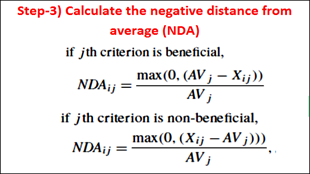

In [ ]:
neg_pda=np.zeros(shape=(mobile_full_np.shape[0],mobile_full_np.shape[1])) 
for k in range(mobile_full_np.shape[1]):
  for l in range(mobile_full_np.shape[0]):
    if types[k]=='cost':
     
      m=max(0,(mobile_full_np[l][k]-AVj[k]))/AVj[k]
      neg_pda[l][k]=+m
    else :
     
      m=max(0,(AVj[k]-mobile_full_np[l][k]))/AVj[k]
      neg_pda[l][k]=+m
print(neg_pda)    

[[ 0.          0.          0.          0.          0.80884382]
 [ 0.          0.          0.87151317  0.          0.        ]
 [ 1.70607839  1.82284515  0.02296277  0.83402324  0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          2.32705832  0.71850213  0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.48094013  0.28449041  0.34173993  1.13638917]
 [ 0.86792993  0.17449187  0.94425267  0.75591489  0.        ]
 [ 0.          0.          0.60268576  0.          0.        ]
 [ 0.          0.          0.30509705  0.          0.        ]
 [ 0.          0.67517484  0.60541663  0.11552956  0.        ]
 [ 2.03753242  0.93680114  0.94339321  0.86441638  0.        ]
 [ 0.1704297   0.          0.30170093  0.62291506  0.        ]
 [ 4.23808905  0.          0.98278701  0.91687311  0.        ]
 [ 2.54268897  0.05834458  0.87267588  0.87166648  0.        ]
 [ 0.          0.06015948  0.92777066  0.47677296  0.  

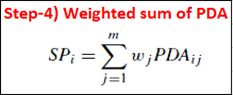

In [ ]:
weighted_pos_pda=np.zeros(shape=(mobile_full_np.shape[0],mobile_full_np.shape[1])) 
for k in range(mobile_full_np.shape[1]):
  for l in range(mobile_full_np.shape[0]):
    m=pos_pda[l][k]*weights[k]
    weighted_pos_pda[l][k]=+m
print(weighted_pos_pda)    


weighted_sum_pos_pda=weighted_pos_pda.sum(axis=1)
weighted_sum_pos_pda=np.array(weighted_sum_pos_pda)
weighted_sum_pos_pda = weighted_sum_pos_pda.reshape(mobile_full_np.shape[0],1)
#np.transpose(weighted_sum_pos_pda)
print(weighted_sum_pos_pda)
  

[[0.14186796 0.14392514 0.20855029 0.03285562 0.        ]
 [0.14465906 0.06099032 0.         0.03669322 0.1598306 ]
 [0.         0.         0.         0.         0.1598306 ]
 [0.14849153 0.04279672 1.99737281 0.04872407 0.07528547]
 [0.15717624 0.         0.         0.08211795 0.1598306 ]
 [0.20923553 0.06897734 0.16982527 0.75148259 0.1598306 ]
 [0.07715258 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.1598306 ]
 [0.13793276 0.02678304 0.         0.02058756 0.1598306 ]
 [0.14813485 0.06108687 0.         0.05089268 0.10671767]
 [0.12346499 0.         0.         0.         0.1598306 ]
 [0.         0.         0.         0.         0.1598306 ]
 [0.         0.01819594 0.         0.         0.1598306 ]
 [0.         0.06386562 0.         0.         0.1598306 ]
 [0.         0.         0.         0.         0.1598306 ]
 [0.0279254  0.         0.         0.         0.1598306 ]
 [0.09932573 0.09135029 0.         0.         0.1598306 ]
 [0.         0

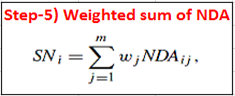

In [ ]:
weighted_neg_pda=np.zeros(shape=(mobile_full_np.shape[0],mobile_full_np.shape[1])) 
for k in range(mobile_full_np.shape[1]):
  for l in range(mobile_full_np.shape[0]):
    m=neg_pda[l][k]*weights[k]
    weighted_neg_pda[l][k]=+m
print(weighted_neg_pda)    

weighted_sum_neg_pda=weighted_neg_pda.sum(axis=1)
weighted_sum_neg_pda=np.array(weighted_sum_neg_pda)
weighted_sum_neg_pda = weighted_sum_neg_pda.reshape(mobile_full_np.shape[0],1)
print(weighted_sum_neg_pda)

[[0.         0.         0.         0.         0.12927799]
 [0.         0.         0.21305701 0.         0.        ]
 [0.39399537 0.30598415 0.00561366 0.1642229  0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.39062175 0.17565072 0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.08073097 0.06954878 0.06729012 0.18162976]
 [0.2004365  0.02929034 0.23083949 0.14884302 0.        ]
 [0.         0.         0.14733734 0.         0.        ]
 [0.         0.         0.07458644 0.         0.        ]
 [0.         0.11333535 0.14800494 0.02274829 0.        ]
 [0.47054013 0.15725214 0.23062938 0.17020745 0.        ]
 [0.0393584  0.         0.0737562  0.12265476 0.        ]
 [0.97872846 0.         0.2402599  0.18053641 0.        ]
 [0.58719909 0.00979376 0.21334126 0.17163502 0.        ]
 [0.         0.01009842 0.22681017 0.09387873 0.        ]
 [0.         0.         0.19467813 0.04677058 0.        ]
 [0.96924356 0

image.png

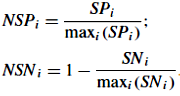

In [ ]:
max_SPi=max(weighted_sum_pos_pda)
max_SNi=max(weighted_sum_neg_pda)
NSPi=weighted_sum_pos_pda/max_SPi
print('NSPi',end='\n')
print(NSPi)
NSNi=1-(weighted_sum_neg_pda/max_SNi)
print('NSNi',end='\n')
print(NSNi)

NSPi
[[0.22796113]
 [0.1738999 ]
 [0.06911084]
 [1.        ]
 [0.17258177]
 [0.58778424]
 [0.03336082]
 [0.06911084]
 [0.14923611]
 [0.15861838]
 [0.12249716]
 [0.06911084]
 [0.07697877]
 [0.09672636]
 [0.06911084]
 [0.08118579]
 [0.15155925]
 [0.05297802]
 [0.23319373]
 [0.60084631]
 [0.27203669]
 [0.31338095]
 [0.29222752]
 [0.68523233]
 [0.11140499]
 [0.32136361]
 [0.3472652 ]]
NSNi
[[0.97328706]
 [0.95597565]
 [0.82026837]
 [1.        ]
 [0.88299012]
 [1.        ]
 [0.91751268]
 [0.87407667]
 [0.96955543]
 [0.98458807]
 [0.94129827]
 [0.78745256]
 [0.95128256]
 [0.71081373]
 [0.79709399]
 [0.93164884]
 [0.95010903]
 [0.        ]
 [0.85496304]
 [1.        ]
 [0.97447131]
 [0.88809178]
 [1.        ]
 [1.        ]
 [0.95340075]
 [0.77532529]
 [0.98110859]]


image.png

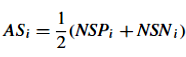

In [ ]:
ASi=(NSPi+NSNi)/2
print(ASi)

[[0.6006241 ]
 [0.56493778]
 [0.4446896 ]
 [1.        ]
 [0.52778595]
 [0.79389212]
 [0.47543675]
 [0.47159375]
 [0.55939577]
 [0.57160323]
 [0.53189772]
 [0.4282817 ]
 [0.51413067]
 [0.40377005]
 [0.43310241]
 [0.50641731]
 [0.55083414]
 [0.02648901]
 [0.54407838]
 [0.80042315]
 [0.623254  ]
 [0.60073636]
 [0.64611376]
 [0.84261616]
 [0.53240287]
 [0.54834445]
 [0.66418689]]


In [ ]:
import numpy as np
deneme=[]
arr = ASi*-1
arr2=np.sort(arr,axis=0)
f=enumerate(arr2, start=1)
f=list(f)

In [ ]:
deneme=pd.DataFrame(f)
deneme[2]=deneme.iloc[:,1]*-1
deneme[2]=deneme[2].str.get(0)
deneme=deneme[[0, 2]]
deneme = deneme.rename(columns={2: 1})
deneme.head()

,0,1
0,1,1.000000
1,2,0.842616
2,3,0.800423
3,4,0.793892
4,5,0.664187


In [ ]:
df_mobile_full_np1=mobile_full.iloc[:,0]
df_mobile_full_np1=pd.DataFrame(df_mobile_full_np1)
asi_last=pd.DataFrame(ASi)
df_mobile_full_np1[1]=asi_last[0]
asi_last.head()
df_mobile_full_np1.head()

,Alternatives,1
0,AEFES,0.600624
1,AVOD,0.564938
2,BANVT,0.444690
3,CCOLA,1.000000
4,DARDL,0.527786


In [ ]:
result = pd.merge(df_mobile_full_np1, 
                      deneme, 
                      on =1, 
                      how ='inner')
result.rename(columns={1:'ASi',0:'Rank'})

,Alternatives,ASi,Rank
0,AEFES,0.600624,9
1,AVOD,0.564938,11
2,BANVT,0.444690,23
3,CCOLA,1.000000,1
4,DARDL,0.527786,18
5,EKIZ,0.793892,4
6,ELITE,0.475437,21
7,ERSU,0.471594,22
8,FADE,0.559396,12
9,KRVGD,0.571603,10


In [1]:
import pandas as pd
import numpy as np
mobile_full=pd.read_excel('edas_data_python.xlsx')
criteria=['P/E RATIO','M/B RATIO','EPS','DIV. YIELD','DIV. PAYOUT']
weights=[0.230936265226239,0.167860748676065,0.244467922233103,0.196904467704045,0.159830596160548]
types=['cost','cost','benefit','benefit','cost']
mobile_full_v2=mobile_full.iloc[:,1:6]
mobile_full_np=np.array(mobile_full_v2)
AVj=mobile_full_np.mean(axis=0)
pos_pda=np.zeros(shape=(mobile_full_np.shape[0],mobile_full_np.shape[1]))
for k in range(mobile_full_np.shape[1]):
  for l in range(mobile_full_np.shape[0]):
    if types[k]=='benefit':
      m=max(0,(mobile_full_np[l][k]-AVj[k]))/AVj[k]
      pos_pda[l][k]=+m
    else :  
      m=max(0,(AVj[k]-mobile_full_np[l][k]))/AVj[k]
      pos_pda[l][k]=+m
neg_pda=np.zeros(shape=(mobile_full_np.shape[0],mobile_full_np.shape[1])) 
for k in range(mobile_full_np.shape[1]):
  for l in range(mobile_full_np.shape[0]):
    if types[k]=='cost':
      m=max(0,(mobile_full_np[l][k]-AVj[k]))/AVj[k]
      neg_pda[l][k]=+m
    else :    
      m=max(0,(AVj[k]-mobile_full_np[l][k]))/AVj[k]
      neg_pda[l][k]=+m
weighted_pos_pda=np.zeros(shape=(mobile_full_np.shape[0],mobile_full_np.shape[1])) 
for k in range(mobile_full_np.shape[1]):
  for l in range(mobile_full_np.shape[0]):
    m=pos_pda[l][k]*weights[k]
    weighted_pos_pda[l][k]=+m
weighted_sum_pos_pda=weighted_pos_pda.sum(axis=1)
weighted_sum_pos_pda=np.array(weighted_sum_pos_pda)
weighted_sum_pos_pda = weighted_sum_pos_pda.reshape(mobile_full_np.shape[0],1)
weighted_neg_pda=np.zeros(shape=(mobile_full_np.shape[0],mobile_full_np.shape[1])) 
for k in range(mobile_full_np.shape[1]):
  for l in range(mobile_full_np.shape[0]):
    m=neg_pda[l][k]*weights[k]
    weighted_neg_pda[l][k]=+m
weighted_sum_neg_pda=weighted_neg_pda.sum(axis=1)
weighted_sum_neg_pda=np.array(weighted_sum_neg_pda)
weighted_sum_neg_pda = weighted_sum_neg_pda.reshape(mobile_full_np.shape[0],1)
max_SPi=max(weighted_sum_pos_pda)
max_SNi=max(weighted_sum_neg_pda)
NSPi=weighted_sum_pos_pda/max_SPi
NSNi=1-(weighted_sum_neg_pda/max_SNi)
ASi=(NSPi+NSNi)/2
deneme=[]
arr = ASi*-1
arr2=np.sort(arr,axis=0)
f=enumerate(arr2, start=1)
f=list(f)
deneme=pd.DataFrame(f)
deneme[2]=deneme.iloc[:,1]*-1
deneme[2]=deneme[2].str.get(0)
deneme=deneme[[0, 2]]
deneme = deneme.rename(columns={2: 1})
df_mobile_full_np1=mobile_full.iloc[:,0]
df_mobile_full_np1=pd.DataFrame(df_mobile_full_np1)
asi_last=pd.DataFrame(ASi)
df_mobile_full_np1[1]=asi_last[0]
result = pd.merge(df_mobile_full_np1, 
                      deneme, 
                      on =1, 
                      how ='inner')
result.rename(columns={1:'ASi',0:'Rank'})

,Alternatives,ASi,Rank
0,AEFES,0.600624,9
1,AVOD,0.564938,11
2,BANVT,0.444690,23
3,CCOLA,1.000000,1
4,DARDL,0.527786,18
5,EKIZ,0.793892,4
6,ELITE,0.475437,21
7,ERSU,0.471594,22
8,FADE,0.559396,12
9,KRVGD,0.571603,10
